In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv(r'Social_Network_Ads.csv')
df=pd.DataFrame(data)
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              400 non-null    int64
 1   EstimatedSalary  400 non-null    int64
 2   Purchased        400 non-null    int64
dtypes: int64(3)
memory usage: 9.5 KB


In [4]:
df.describe()

,Age,EstimatedSalary,Purchased
count,400.000000,400.000000,400.000000
mean,37.655000,69742.500000,0.357500
std,10.482877,34096.960282,0.479864
min,18.000000,15000.000000,0.000000
25%,29.750000,43000.000000,0.000000
50%,37.000000,70000.000000,0.000000
75%,46.000000,88000.000000,1.000000
max,60.000000,150000.000000,1.000000


<Axes: >

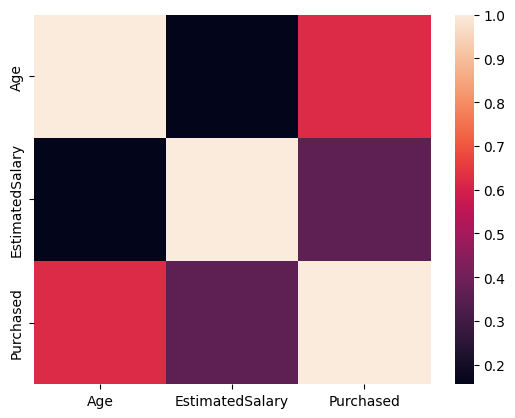

In [5]:
sns.heatmap(df.corr())

In [6]:
df.isnull().sum()

Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

<Axes: xlabel='Purchased', ylabel='count'>

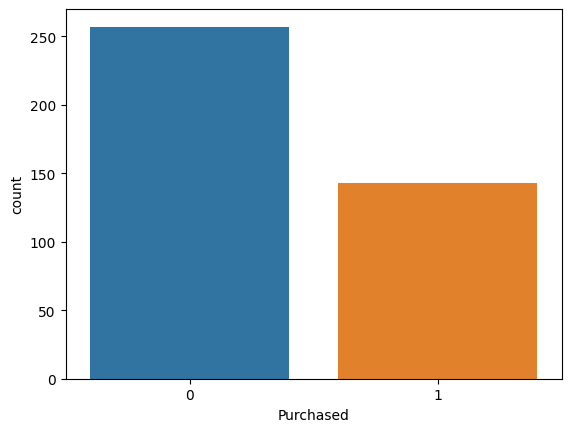

In [7]:
sns.countplot(data=df,x='Purchased')

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values

In [9]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [19]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=400)


In [20]:
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [21]:
y_pred=model.predict(x_test)

In [22]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [23]:
cmatrix=confusion_matrix(y_test,y_pred)
print(cmatrix)

[[55  3]
 [ 2 20]]


<Axes: title={'center': 'Confussion Matrix Visualization'}>

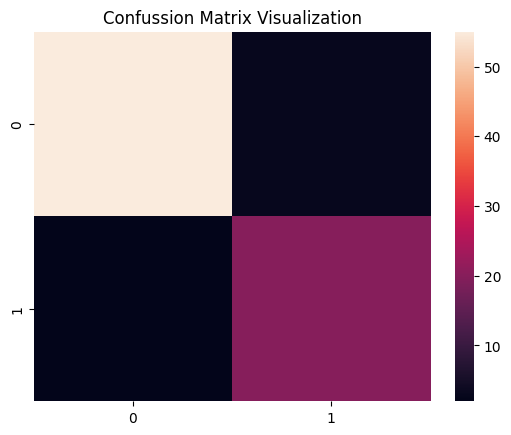

In [24]:
plt.title("Confussion Matrix Visualization")
sns.heatmap(cmatrix)

In [25]:
report=classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.96        58
           1       0.87      0.91      0.89        22

    accuracy                           0.94        80
   macro avg       0.92      0.93      0.92        80
weighted avg       0.94      0.94      0.94        80



In [26]:
accuracy_score_model=accuracy_score(y_test,y_pred)
print(accuracy_score_model)

0.9375
